# K-Means Clustering

We are looking at the IRIS dataset, which has 4 columns of data.
The columns are: sepal length, sepal width, petal length, and petal width. These corresponds to certain measurements of flowers.
Objective: to cluster the data into K groups using the data and K-Means.

In [23]:
# Importing the libraries
import numpy as np # Numerical Calculations
import pandas as pd # Data Ingestions and Manipulations
import matplotlib.pyplot as plt # Visualizations
from sklearn import datasets

In [24]:
# Step 1: Load iris dataset
iris = datasets.load_iris() # returns a dictionary data type
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names) # convert to a table (dataframe)
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [25]:
# Step 2: Find optimal k to use for k-means (Elbow Method)
from sklearn.cluster import KMeans

# WCSS: Within Cluster Sum of Squares
wcss = []

# We need to run the algo for some values of k to figure out which K to choose
# Let's do it for k between 1 to 20 inclusive

trial_k_values = range(1,21)

for i in trial_k_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(iris_df) # running k-means for all values of k
    wcss.append(kmeans.inertia_) #inertia_ is where k-means store the WCSS value


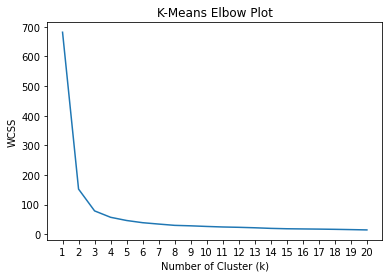

In [26]:
# Plot the elbow plot

plt.plot(trial_k_values, wcss)
plt.title("K-Means Elbow Plot")
plt.xlabel('Number of Cluster (k)')
plt.ylabel('WCSS')
plt.xticks(trial_k_values)
plt.show()

You will see that there are 2 elbows from the plot above: k = 2 and k = 3. Study has shown that in general, it's better to select the elbow with the lower WCSS.

In [27]:
# We have chose the value of k as 3
# Let's train our k-means algorithm with this k value

kmeans = KMeans(n_clusters = 3)
kmeans_model = kmeans.fit(iris_df)

In [28]:
y_kmeans = kmeans_model.predict(iris_df) # this is the Cluster each datapoint is allocated

In [29]:
# Add the above to the original table/dataframe to see the data
iris_df['Cluster'] = y_kmeans
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [30]:
X = iris_df.iloc[:,0:4].values # "1:" means from Column 1 all the way to the end
y = iris_df.iloc[:,4].values # 0th is the survived column

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
log_reg = LogisticRegression(max_iter=1000) # default max_iter is 100, which can be insufficient!
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [34]:
y_pred = log_reg.predict(X_test) # X_test is the 20% test data

In [35]:
from sklearn import metrics

In [36]:
test_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", test_acc)

Accuracy:  0.9666666666666667


Text(33.0, 0.5, 'Predicted')

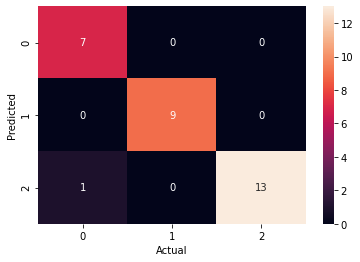

In [37]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(conf_mat.T, annot=True) # .T means .transpose; without transpose the x- and y- label will be flipped :)
plt.xlabel('Actual')
plt.ylabel('Predicted')